In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'MSFT'

data = yf.download(stock, start, end)

In [42]:
data.reset_index(inplace=True)

In [44]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2012-01-03,21.162369,21.312568,20.861968,20.988452,64731500
1,2012-01-04,21.660400,21.715737,21.170275,21.201896,80516100
2,2012-01-05,21.881754,21.921280,21.573449,21.644595,56081400
3,2012-01-06,22.221676,22.284918,21.763171,21.763171,99455500
4,2012-01-09,21.929180,22.213770,21.913369,22.174243,59706800
...,...,...,...,...,...,...
3259,2024-12-16,451.589996,452.179993,445.279999,447.269989,23598800
3260,2024-12-17,454.459991,455.290009,449.570007,451.010010,22733500
3261,2024-12-18,437.390015,452.649994,437.019989,451.320007,24444500


In [46]:
#moving average
ma_100_days = data.Close.rolling(100).mean()

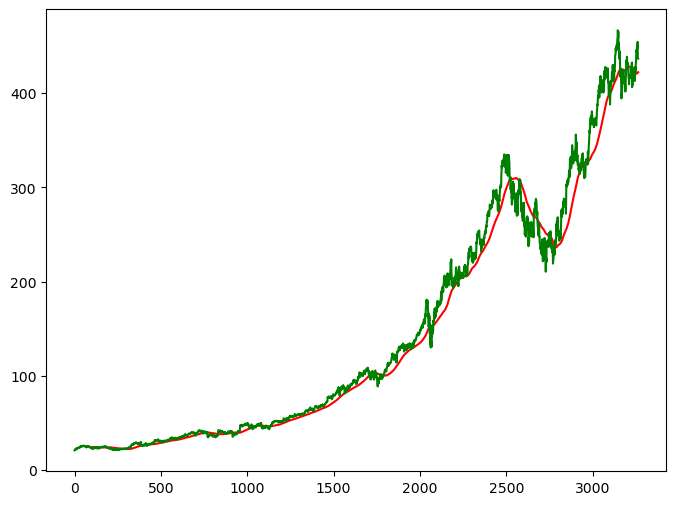

In [48]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [50]:
ma_200_days = data.Close.rolling(200).mean()

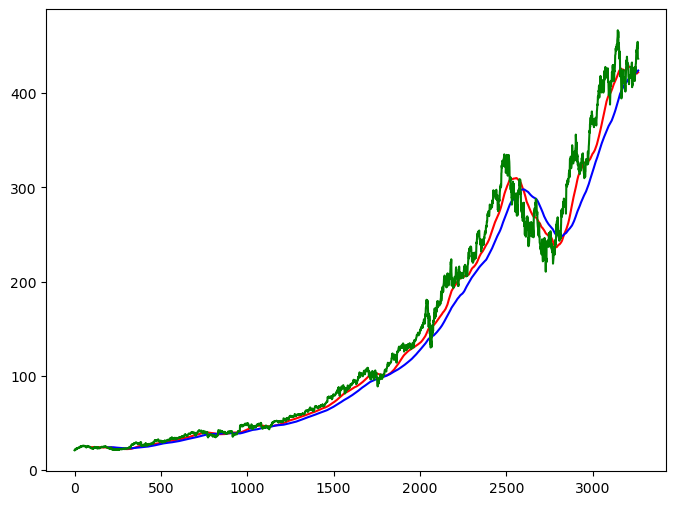

In [52]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [54]:
data.dropna(inplace = True)

In [56]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [58]:
data_train.shape[0]

2611

In [60]:
data_test.shape[0]

653

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [64]:
data_train_scale = scaler.fit_transform(data_train)

In [66]:
x=[]
y=[]

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [68]:
x,y = np.array(x), np.array(y)

In [70]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [72]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1))))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\shali\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - loss: 0.0537
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - loss: 0.0046
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - loss: 0.0044
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - loss: 0.0044
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - loss: 0.0039
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - loss: 0.0040
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - loss: 0.0027
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step - loss: 0.0027
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - loss: 0.0023
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - loss: 0.0027
Epoch 13/50
35/79 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - loss: 0.0029

In [ ]:
model.summary()

In [ ]:
# Prepare test data
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.transform(data_test)

x_test = []
y_test = []
for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
# Make predictions
y_predict = model.predict(x_test)

In [ ]:
# Scale back the predictions to the original range
scale = 1 / scaler.scale_[0]
y_predict = y_predict * scale
y_test = y_test * scale

In [ ]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()